In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.express as px
import numpy as np

In [2]:
animals_df = pd.read_csv("animals_df_updated.csv")

In [3]:
animals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578 entries, 0 to 1577
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1578 non-null   object 
 1   Scientific Name    1578 non-null   object 
 2   Class              1578 non-null   object 
 3   Family             1578 non-null   object 
 4   Lifespan (years)   1578 non-null   float64
 5   Top Speed (km/h)   1578 non-null   float64
 6   Weight (kg)        1578 non-null   float64
 7   Length (cm)        1578 non-null   float64
 8   Diet               1578 non-null   int64  
 9   Population Trend   1578 non-null   int64  
 10  Population Status  1578 non-null   int64  
 11  Mating Behavior    1578 non-null   int64  
 12  Arid Climate       1578 non-null   int64  
 13  Cold Climate       1578 non-null   int64  
 14  Polar Climate      1578 non-null   int64  
 15  Temperate Climate  1578 non-null   int64  
 16  Tropical Climate   1578 

Text(0.5, 1.0, 'Population Status')

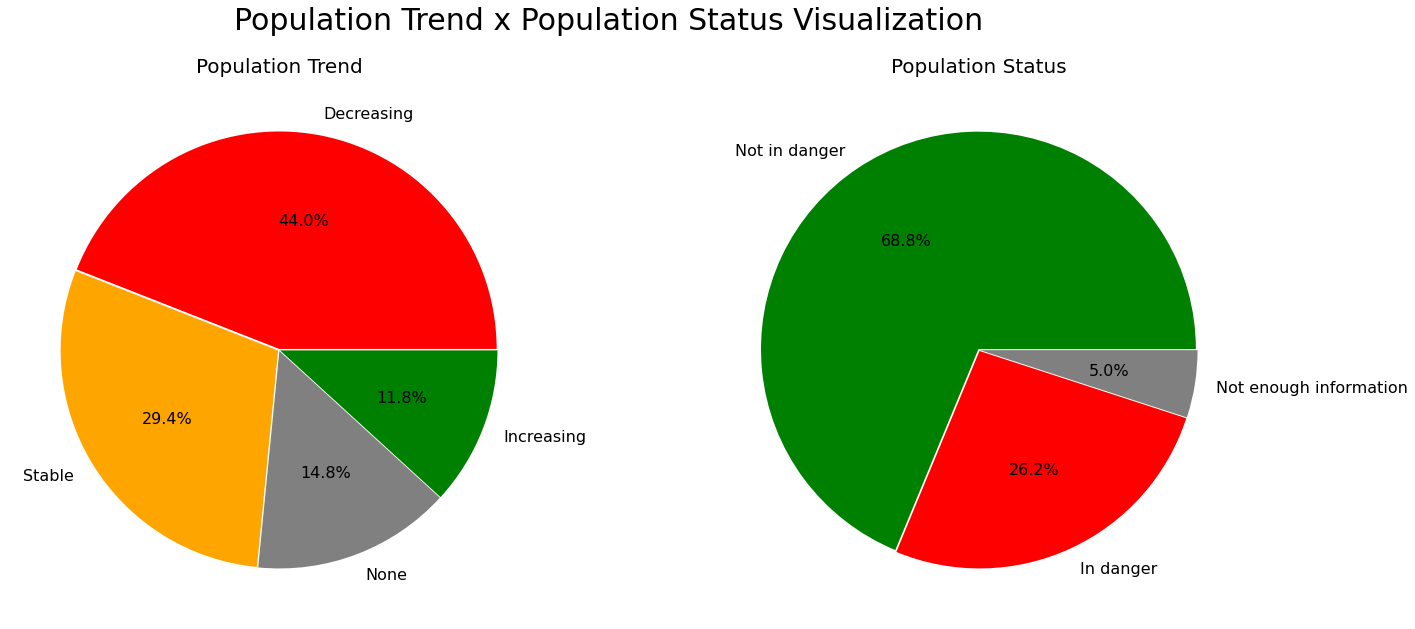

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 10))
fig.suptitle("Population Trend x Population Status Visualization", fontsize = 30)

axes[0].pie(x = animals_df["Population Trend"].value_counts(), explode = [0.005, 0.005, 0.005, 0.005],
            labels = ["Decreasing", "Stable", "None", "Increasing"], autopct = '%1.1f%%', textprops = {'fontsize': 16}
           , colors = ["red", "orange", "grey", "green"])
axes[0].set_title("Population Trend", fontsize = 20)

axes[1].pie(x = animals_df["Population Status"].value_counts(), explode = [0.005, 0.005, 0.005], 
            labels = ["Not in danger", "In danger", "Not enough information"], autopct='%1.1f%%', textprops = {'fontsize': 16}
           , colors = ["green", "red", "grey"])
axes[1].set_title("Population Status", fontsize = 20)

Text(0.5, 1.0, 'Mating Behavior')

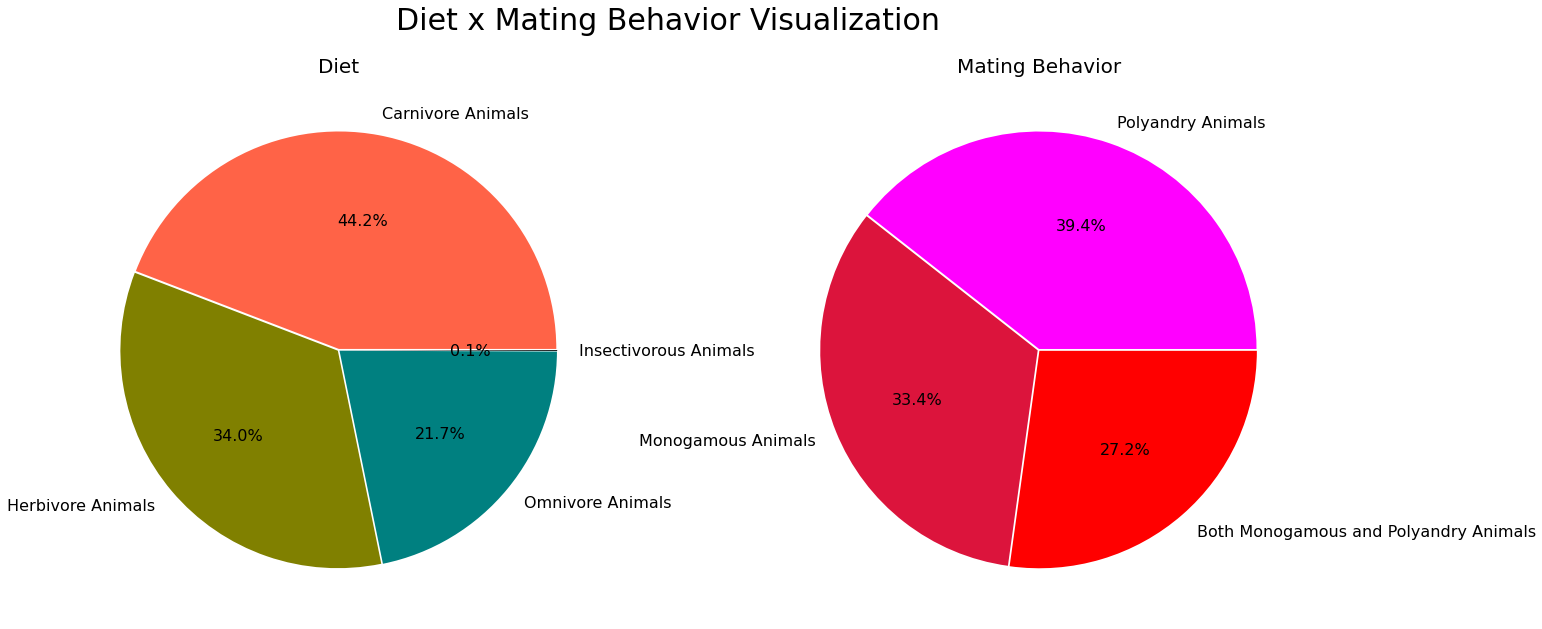

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 10))
fig.suptitle("Diet x Mating Behavior Visualization", fontsize = 30)

axes[0].pie(x = animals_df["Diet"].value_counts(), explode = [0.005, 0.005, 0.005, 0.005],
            labels = ["Carnivore Animals", "Herbivore Animals", "Omnivore Animals", "Insectivorous Animals"], 
            autopct = '%1.1f%%', textprops = {'fontsize': 16}, colors = ["tomato", "olive", "teal", "black"])
axes[0].set_title("Diet", fontsize = 20)

axes[1].pie(x = animals_df["Mating Behavior"].value_counts(), explode = [0.005, 0.005, 0.005],
            labels = ["Polyandry Animals", "Monogamous Animals", "Both Monogamous and Polyandry Animals"], 
            autopct='%1.1f%%', textprops = {'fontsize': 16}, colors = ["magenta", "crimson", "red"])
axes[1].set_title("Mating Behavior", fontsize = 20)

## Cross-tabulation

Cross-tabulation, also known as cross-tab or contingency table, is a statistical tool used to examine the relationship within the data that is not readily evident.

## Correlation between the "Population Trend" and "Population Status" columns

The 'Population Trend' column:
* 0 - None
* 1 - Decreasing
* 2 - Stable
* 3 - Increasing

The 'Population Status' column:
* 0 - Not enough information
* 1 - Not in danger
* 2 - In danger

As we can observe from our cross-tabulation, there is a strong correlation between animals with "Stable" and "Increasing" population trend to the fact that they are not in danger.

In [6]:
pd.crosstab(index = animals_df["Population Trend"], columns = animals_df["Population Status"], normalize = "index")

Population Status,0,1,2
Population Trend,,,
0,0.270386,0.583691,0.145923
1,0.017266,0.502158,0.480576
2,0.002155,0.952586,0.045259
3,0.016129,0.849462,0.134409


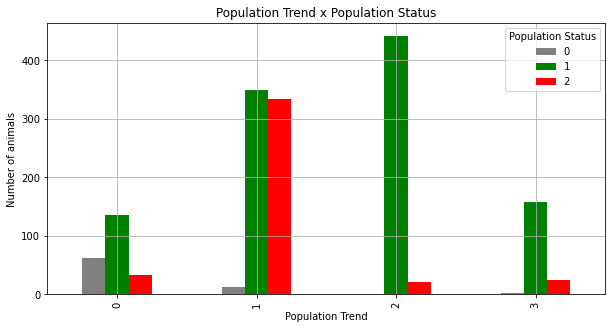

In [7]:
ct = pd.crosstab(index = animals_df["Population Trend"], columns = animals_df["Population Status"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Population Trend x Population Status", color = ["grey", "green", "red"], 
        grid = True)
plt.ylabel("Number of animals")
plt.show()

## Correlation between the "Class" and "Population Status" columns

The 'Population Status' column:
* 0 - Not enough information
* 1 - Not in danger
* 2 - In danger

We can observe from our cross-tabulation couple of things:
* As a percentage of the whole class, the aves are in the best place as more than 80% of the aves are not in danger.

* There are no surprises on the part of the mammals that stand at the top of the classes that are in danger, apparently because it is easier to hunt them and usually they or their parts will have a higher value.

In [8]:
pd.crosstab(index = animals_df["Class"], columns = animals_df["Population Status"], normalize = "index")

Population Status,0,1,2
Class,,,
Aves,0.002049,0.819672,0.178279
Mammalia,0.051282,0.615385,0.333333
Reptilia,0.146552,0.676724,0.176724


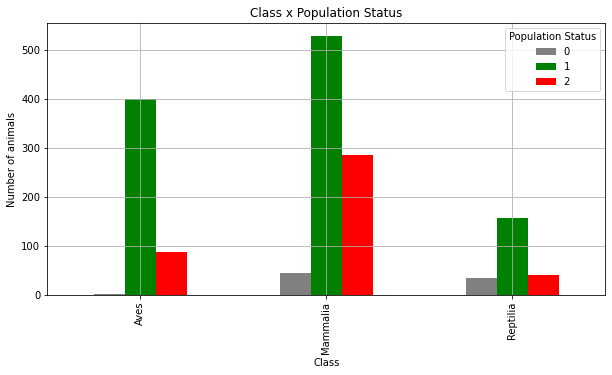

In [9]:
ct = pd.crosstab(index = animals_df["Class"], columns = animals_df["Population Status"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Class x Population Status", color = ["grey", "green", "red"], grid = True)
plt.ylabel("Number of animals")
plt.show()

## Correlation between the "Class" and "Population Trend" columns

The 'Population Trend' column:

* 0 - None
* 1 - Decreasing
* 2 - Stable
* 3 - Increasing

We can observe from our cross-tabulation couple of things:

* The overall trend is quite dismal, most animals are in a "Stable" or "Decreasing" trend, with the likelihood that the trend will continue to decline in the future.

* Here, too, mammals are at the top of the classes with the highest percentage of "Decreasing" trend, which makes sense given that they also have the highest percentage of animals in danger.

In [10]:
pd.crosstab(index = animals_df["Class"], columns = animals_df["Population Trend"], normalize = "index")

Population Trend,0,1,2,3
Class,,,,
Aves,0.047131,0.463115,0.239754,0.250000
Mammalia,0.149184,0.494172,0.287879,0.068765
Reptilia,0.353448,0.193966,0.431034,0.021552


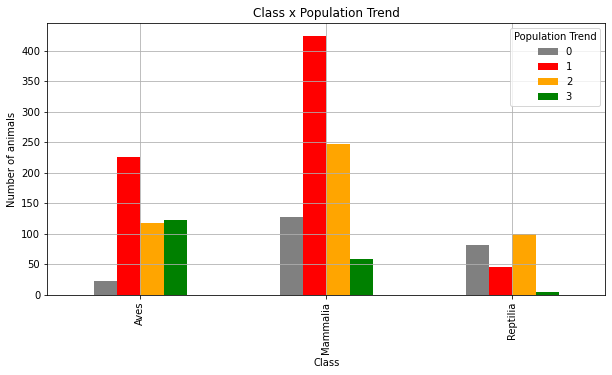

In [11]:
ct = pd.crosstab(index = animals_df["Class"], columns = animals_df["Population Trend"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Class x Population Trend", grid = True, color = ["grey", "red", "orange", "green"])
plt.ylabel("Number of animals")
plt.show()

## Correlation between the "Population Status" and "Diet" columns

The 'Population Status' column:
* 0 - Not enough information
* 1 - Not in danger
* 2 - In danger

The 'Diet' column:
* 0 - Omnivore animals
* 1 - Carnivore animals
* 2 - Herbivore animals
* 3 - Insect diet animals

As we can observe from our cross-tabulation, there is a strong correlation between herbivore animals to the fact that they are in danger. This can be due to the fact that humanity is evolving and lots of vegetated areas that serve as a food source for those animals are being destroyed in favor of projects.

In [12]:
pd.crosstab(index = animals_df["Population Status"], columns = animals_df["Diet"], normalize = "index")

Diet,0,1,2,3
Population Status,,,,
0,0.101266,0.759494,0.139241,0.000000
1,0.232258,0.468203,0.298618,0.000922
2,0.200483,0.311594,0.487923,0.000000


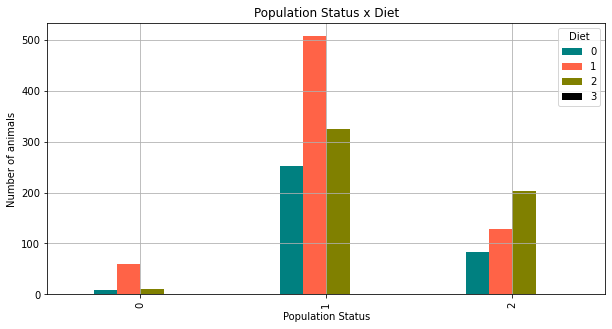

In [13]:
ct = pd.crosstab(index = animals_df["Population Status"], columns = animals_df["Diet"])
ct.plot(kind = "bar", figsize = (10, 5), title = "Population Status x Diet", grid = True, color = ["teal", "tomato", "olive", "black"])
plt.ylabel("Number of animals")
plt.show()

## Average lifespan by continent

Sources used: https://plotly.com/python/icicle-charts/

In [14]:
africa_df = animals_df[animals_df["Africa"] == 1]
africa_ls_mean = np.mean(a = np.array(africa_df["Lifespan (years)"].value_counts().index.to_list()))

antarctica_df = animals_df[animals_df["Antarctica"] == 1]
antarctica_ls_mean = np.mean(a = np.array(antarctica_df["Lifespan (years)"].value_counts().index.to_list()))

asia_df = animals_df[animals_df["Asia"] == 1]
asia_ls_mean = np.mean(a = np.array(asia_df["Lifespan (years)"].value_counts().index.to_list()))

europe_df = animals_df[animals_df["Europe"] == 1]
europe_ls_mean = np.mean(a = np.array(europe_df["Lifespan (years)"].value_counts().index.to_list()))

americas_df = animals_df[(animals_df["North America"] == 1) | (animals_df["South America"] == 1)]
americas_ls_mean = np.mean(a = np.array(americas_df["Lifespan (years)"].value_counts().index.to_list()))

oceania_df = animals_df[animals_df["Oceania"] == 1]
oceania_ls_mean = np.mean(a = np.array(oceania_df["Lifespan (years)"].value_counts().index.to_list()))

In [15]:
lifespan_continents = {"Continent": ["Africa", "Antarctica", "Asia", "Europe", "Americas", "Oceania"],
                       "Lifespan": [africa_ls_mean, antarctica_ls_mean, asia_ls_mean, europe_ls_mean, americas_ls_mean, oceania_ls_mean]}

In [16]:
lifespan_continents_df = pd.DataFrame(data = lifespan_continents)

In [17]:
#fig = px.icicle(lifespan_continents_df, path=[px.Constant('World'), 'Continent'],
#                  color='Lifespan')
#fig.show()
lifespan_continents_df.set_index(keys = "Continent", inplace = True)

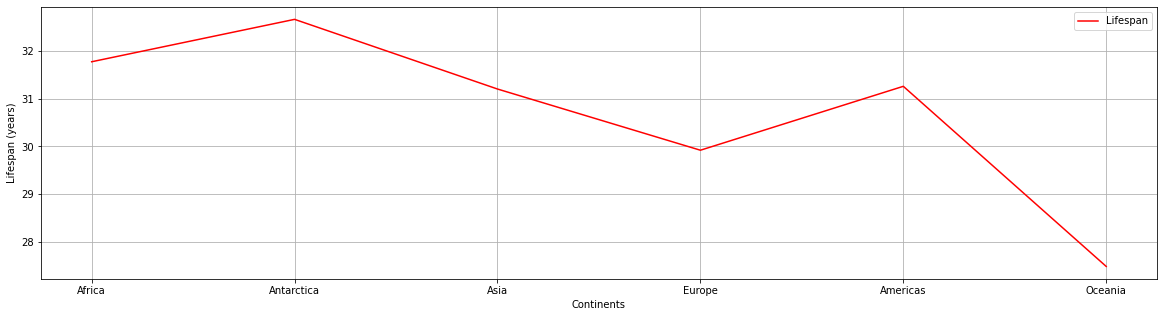

In [18]:
lifespan_continents_df.plot(kind = "line", figsize = (20, 5), grid = True, color = "red")
plt.xlabel("Continents")
plt.ylabel("Lifespan (years)")
plt.show()